Much of this NB is adapted from [A data Scientist's Guide to Exploratory Data Analysis by Miriam Santos](https://medium.com/data-science/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6)

In [117]:
import pandas as pd

# Codeline below is the WRONG way rto laod the data
df0 = pd.read_csv('data/adult.csv',nrows=5)
# Right way: Note the use of the  na_values param. 
# Data Value "?" mapped to np.nan
df = pd.read_csv('data/adult.csv',na_values="?")

In [118]:
adult = df
print(f"{len(adult):,}")
adult[:5]

32,561


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Wrong result: The `?` strings won't get interopreted as NaN.

In [49]:
df0

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Categorical columns

Columns with non numerical categorizing information need to be handled differently:

In [121]:
cat_cols = ['workclass', 'education', 'education.num',
            'marital.status', 'occupation', 'relationship', 'race',
            'sex', 'native.country', 'income']
non_cat_cols = [col for col in adult.columns if col not in cat_cols]

In [120]:
len(adult.columns), len(cat_cols),len(non_cat_cols)

(15, 10, 5)

Each categorical column defines a different way of grouping the rows:

In [67]:
# Create a list of Series.  Each gives the size of the row groups
# defined by a categorial columnb

category_dfs = [adult.groupby(col).size() for col in cat_cols]

for c_df in category_dfs:
    print()
    print(c_df)


workclass
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22673
Self-emp-inc         1116
Self-emp-not-inc     2540
State-gov            1298
Without-pay            14
dtype: int64

education
10th              933
11th             1175
12th              433
1st-4th           166
5th-6th           332
7th-8th           645
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5353
Doctorate         413
HS-grad         10494
Masters          1722
Preschool          50
Prof-school       576
Some-college     7282
dtype: int64

education.num
1        50
2       166
3       332
4       645
5       514
6       933
7      1175
8       433
9     10494
10     7282
11     1382
12     1067
13     5353
14     1722
15      576
16      413
dtype: int64

marital.status
Divorced                  4441
Married-AF-spouse           23
Married-civ-spouse       14970
Married-spouse-absent      418
Never-married            10667
S

Some of the categoircal information overlaps. 

We'll Look at correlations among categorical columns below.  

First we'lll look at the easy case of correklation.  Numerical data.

### Heat maps: Visualizing correlations (non categorical case)

Here are the non-categorical correlations.

In [94]:
non_cat_adult = adult[non_cat_cols] 
non_cat_adult.corr()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076447,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,0.000429,-0.010260,-0.018898
capital.gain,0.077676,0.000429,1.000000,-0.031639,0.078408
capital.loss,0.057745,-0.010260,-0.031639,1.000000,0.054229
hours.per.week,0.068515,-0.018898,0.078408,0.054229,1.000000


The strongest positive correlation is between `capital.gain` and `hours.per.week`.
The strongest negative correlation is between `fnlwgt` and `age`.

We'll visualize these correlation numbers with a `seaborn` heatmap, but first we'll
log-**transform** the numbers to help maximize color contrasts.  To transform,
we take absolute values and logs of those absolute values for the correlations.
This transformation loses information about whether correlations are
positive or negative, but it helps maximize color contrasts.

So how did we arrive at this transformation?

The heat map withoutany transformation.  Note:  You may get better color contrasts than what I see here, depending on your default graphics engine.

<Axes: >

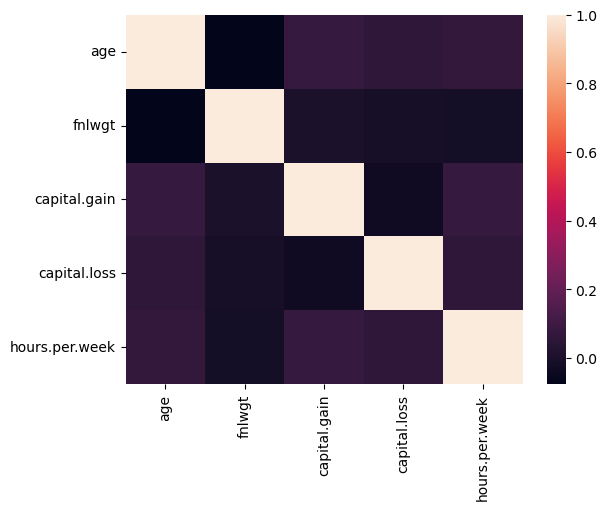

In [99]:
import seaborn as sns
import numpy as np
sns.heatmap(non_cat_adult.corr())

### Choosing a transformation

Problem: lots of numbers at the extreme have given us a gheat map that is mostly
very light and very dark.  No colors in the middle, therefore not
much color at all.

Soln:  Use `log` to give the colors a more compressed value space.

Immediate Problem: Many of our correlation num,bers are negative.
log not defined for negative numbers. 

Soln: Use the absolute values  of the correlation. 

In [103]:
np.log(np.abs(non_cat_adult.corr()))

,age,fnlwgt,capital.gain,capital.loss,hours.per.week
age,0.000000,-2.571155,-2.555210,-2.851715,-2.680709
fnlwgt,-2.571155,0.000000,-7.755011,-4.579489,-3.968697
capital.gain,-2.555210,-7.755011,0.000000,-3.453359,-2.545834
capital.loss,-2.851715,-4.579489,-3.453359,0.000000,-2.914535
hours.per.week,-2.680709,-3.968697,-2.545834,-2.914535,0.000000


Problem: correlations of 1 (the strongest possible) get represented as 0.
Also, because the absolute values of correlation numbers fall between 0 and 1,  log makes all the others negative. Soln: Use absolute value.  Replace 0s with max value:

In [170]:

def log_xn(data):
    data1 = np.abs(np.log(np.abs(data)))
    # replace 0s corrs on diagonal with maxval
    mx = data1.max().max()
    return data1.where(data1 != 0,other=mx)

log_xn(non_cat_adult.corr())

,age,fnlwgt,capital.gain,capital.loss,hours.per.week
age,7.755011,2.571155,2.555210,2.851715,2.680709
fnlwgt,2.571155,7.755011,7.755011,4.579489,3.968697
capital.gain,2.555210,7.755011,7.755011,3.453359,2.545834
capital.loss,2.851715,4.579489,3.453359,7.755011,2.914535
hours.per.week,2.680709,3.968697,2.545834,2.914535,7.755011


Good to go:

<Axes: >

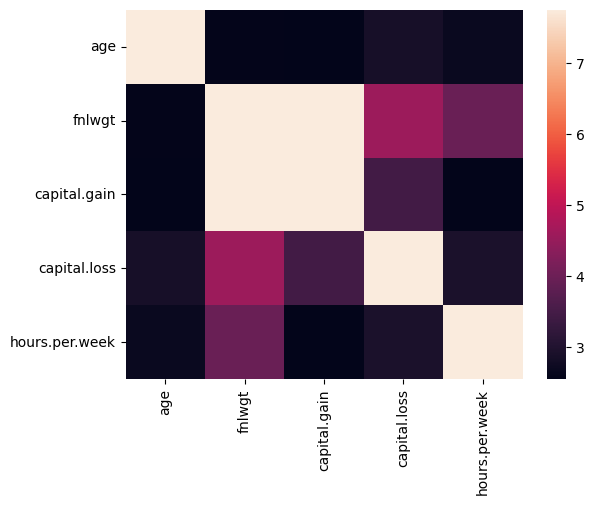

In [169]:
import seaborn as sns
import numpy as np

def log_xn(data):
    data1 = np.abs(np.log(np.abs(data)))
    mx = data1.max().max()
    return data1.where(data1 != 0,other=mx)

sns.heatmap(log_xn(non_cat_adult.corr()))

The strongest correlation were between `capital.gain` and `hours.per.week` (positive), the strongest negative correlation between `fnlwgt` and `age`.

And the correct column pairs are getting high-value colors.

### Heat maps: Visualizing correlations (categorical case)

Let's look for dependencies in the categorical columns involving missing data:

Compute correlations and drop all rows and cols that are completely NaN.

Note there are no numbers, just Booleans, which will be treated as 0s and 1s respectively, when
computing correlations:

In [181]:
cat_adult_nm

,workclass,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,True,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False


In [180]:
cat_adult_nm.corr()

,workclass,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
workclass,1.000000,NaN,NaN,NaN,0.997985,NaN,NaN,NaN,-0.005897,NaN
education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education.num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital.status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,0.997985,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,-0.006012,NaN
relationship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
native.country,-0.005897,NaN,NaN,NaN,-0.006012,NaN,NaN,NaN,1.000000,NaN
income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's drop all the all-NaN rows and all-Nan  columns:

In [172]:
cat_adult_nm_corr = cat_adult_nm.corr().dropna(axis=0,how="all").dropna(axis=1,how="all")
cat_adult_nm_corr

,workclass,occupation,native.country
workclass,1.000000,0.997985,-0.005897
occupation,0.997985,1.000000,-0.006012
native.country,-0.005897,-0.006012,1.000000


The correlation plus the visualization code:

<Axes: >

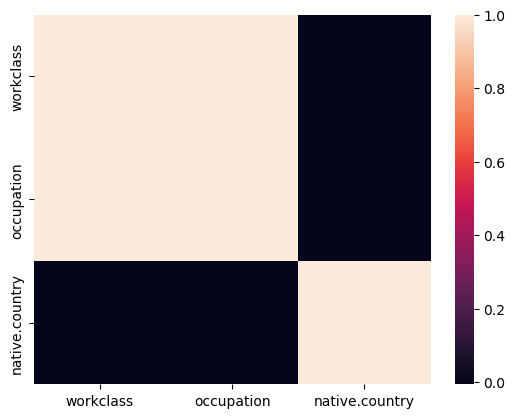

In [179]:
import seaborn as sns

# Categorical columns only
cat_adult = adult[cat_cols]
# Get booleans tagging missing data cells in categorical columns
cat_adult_nm= cat_adult.isna()
cat_adult_nm_corr = cat_adult_nm.corr().dropna(axis=0,how="all").dropna(axis=1,how="all")
# Use a seaborn heat map 
sns.heatmap(cat_adult_nm_corr)

We see strong correlations between the `workclass` and `occupation` columns, meaning that if one
kind of data is mssing, the other tends to be too.

#### Data cleanup and data quality (Issues)

Now **if we want to**, we can drop duplicated rows:

In [52]:
# drop duplicated rows
adult = adult.drop_duplicates()#adult[adult.duplicated(keep=False)] # check duplicated rows

When we would we **not** want to drop duplicated rows?

>Regarding the duplicate rows, it would not be strange to find “repeated” observations given that most features represent categories where several people might “fit in” simultaneously. 
> Miriam Santos

So they **are** sometimes a natural feature of our data and dropping them may distort meaningful statistics.

Number of rows dropped:

In [53]:
len(df)-len(adult)

24

Missing data stats.  

Common to many datasets are missing data values (or data scalars, as we'll say).

In [56]:
missing_data_cts = adult.isna().sum() 
missing_data_cts 

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [61]:
total_missing_scalars = missing_data_cts.sum() # TOTAL number of missing cells
total_missing_scalars

np.int64(4261)

In [62]:
total_scalars = adult.size # T0tal number of cells in the DF
total_scalars 

488055

Less than 1 per cent of the data is missing:

In [66]:
# pct of data scalars missing
pct_missing = total_missing_scalars/total_scalars
print(pct_missing) 
print(f"{pct_missing:.3%}") 

0.008730573398489924
0.873%
